In [2]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

%matplotlib inline

In [ ]:
file_path = '/content/gdrive/MyDrive/ENSC/3A/Deep Learning/features_4.csv'

def load_and_preprocess_data(file_path):
    """
    Load the dataset from the given file path and perform preprocessing steps.
    """
    df = pd.read_csv(file_path)
    df.sort_values(by=['time','latitude','longitude'])
    df = df.drop(["g"], axis=1)
    df = df.interpolate()
    df = df.dropna()

    for col in df.select_dtypes(include='float64').columns:
      df[col] = df[col].astype('float32', copy=False)

    return df

df = load_and_preprocess_data(file_path)
df.info()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
Int64Index: 718854 entries, 1 to 718854
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       718854 non-null  object 
 1   latitude   718854 non-null  float32
 2   longitude  718854 non-null  float32
 3   10u        718854 non-null  float32
 4   10v        718854 non-null  float32
 5   100u       718854 non-null  float32
 6   100v       718854 non-null  float32
 7   msl        718854 non-null  float32
 8   sst        718854 non-null  float32
 9   swvl1      718854 non-null  float32
 10  geo500     718854 non-null  float32
 11  2t         718854 non-null  float32
dtypes: float32(11), object(1)
memory usage: 41.1+ MB


In [ ]:
df

,time,latitude,longitude,10u,10v,100u,100v,msl,sst,swvl1,geo500,2t
571,2007-02-19 00:00:00,38.0,125.00,1.483994,-3.711853,1.804810,-4.168839,101956.1875,279.649170,0.000002,53750.945312,4.099030
572,2007-02-19 00:00:00,38.0,125.25,0.976181,-2.776306,1.536255,-3.772354,101956.4375,279.913940,0.194719,53744.445312,2.188873
573,2007-02-19 00:00:00,38.0,125.50,0.828720,-1.950134,1.444458,-3.110245,101956.6875,280.178711,0.247331,53737.445312,0.559967
574,2007-02-19 00:00:00,38.0,125.75,0.676376,-1.374939,1.278442,-2.483292,101953.6875,280.443481,0.224993,53729.695312,-0.166595
575,2007-02-19 00:00:00,38.0,126.00,0.438095,-1.237244,0.996216,-2.166885,101948.6875,280.708252,0.306246,53722.695312,-0.166595
...,...,...,...,...,...,...,...,...,...,...,...,...
718850,2023-11-19 12:00:00,34.0,129.00,10.564636,-3.080109,11.930634,-3.466751,101845.8750,294.018066,0.000005,55508.691406,16.389801
718851,2023-11-19 12:00:00,34.0,129.25,10.969910,-2.972687,12.307587,-3.304642,101832.6250,294.203613,0.000005,55488.191406,16.299957
718852,2023-11-19 12:00:00,34.0,129.50,10.767761,-2.702179,12.258759,-3.010696,101818.6250,294.274902,0.000005,55467.941406,16.333160
718853,2023-11-19 12:00:00,34.0,129.75,11.442566,-2.366241,12.838837,-2.653275,101801.6250,294.237793,0.000005,55448.691406,16.514801


In [ ]:
df = df.iloc[570:, :]
df

,time,latitude,longitude,10u,10v,100u,100v,msl,sst,swvl1,geo500,2t
571,2007-02-19 00:00:00,38.0,125.00,1.483994,-3.711853,1.804810,-4.168839,101956.1875,279.649170,0.000002,53750.945312,4.099030
572,2007-02-19 00:00:00,38.0,125.25,0.976181,-2.776306,1.536255,-3.772354,101956.4375,279.913940,0.194719,53744.445312,2.188873
573,2007-02-19 00:00:00,38.0,125.50,0.828720,-1.950134,1.444458,-3.110245,101956.6875,280.178711,0.247331,53737.445312,0.559967
574,2007-02-19 00:00:00,38.0,125.75,0.676376,-1.374939,1.278442,-2.483292,101953.6875,280.443481,0.224993,53729.695312,-0.166595
575,2007-02-19 00:00:00,38.0,126.00,0.438095,-1.237244,0.996216,-2.166885,101948.6875,280.708252,0.306246,53722.695312,-0.166595
...,...,...,...,...,...,...,...,...,...,...,...,...
718850,2023-11-19 12:00:00,34.0,129.00,10.564636,-3.080109,11.930634,-3.466751,101845.8750,294.018066,0.000005,55508.691406,16.389801
718851,2023-11-19 12:00:00,34.0,129.25,10.969910,-2.972687,12.307587,-3.304642,101832.6250,294.203613,0.000005,55488.191406,16.299957
718852,2023-11-19 12:00:00,34.0,129.50,10.767761,-2.702179,12.258759,-3.010696,101818.6250,294.274902,0.000005,55467.941406,16.333160
718853,2023-11-19 12:00:00,34.0,129.75,11.442566,-2.366241,12.838837,-2.653275,101801.6250,294.237793,0.000005,55448.691406,16.514801


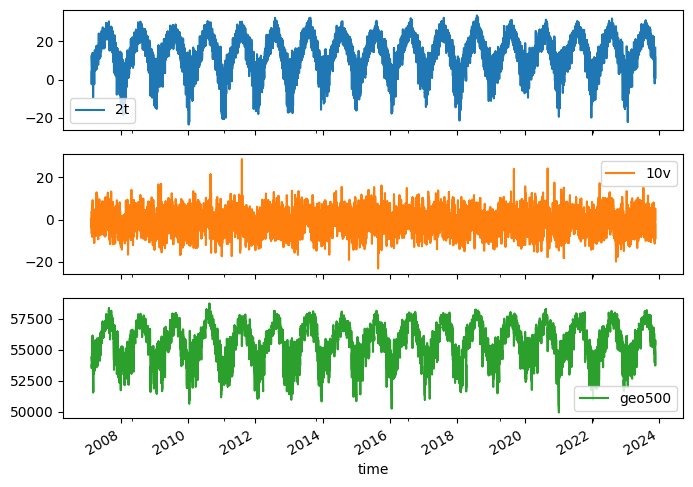

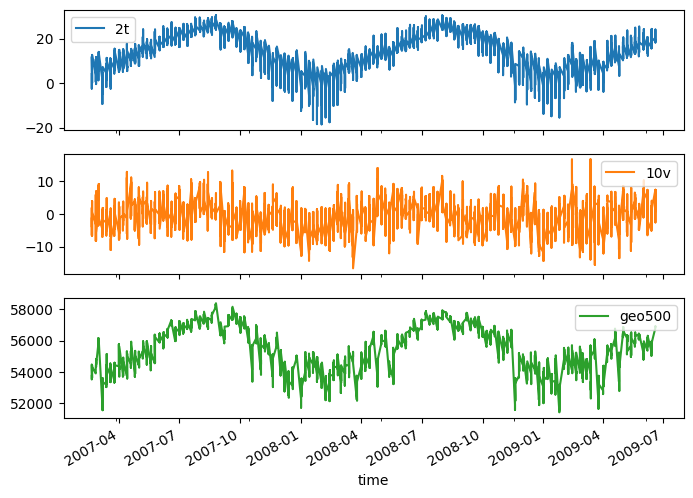

In [ ]:
date_time = pd.to_datetime(df['time'], format='%Y.%m.%d %H:%M:%S')

plot_cols = ['2t', '10v', 'geo500']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:100000]
plot_features.index = date_time[:100000]
_ = plot_features.plot(subplots=True)

In [ ]:
# Extract relevant columns
lat = df['latitude'].unique()
print(f"Latitude: {lat.shape}")
lon = df['longitude'].unique()
print(f"Longitude: {lon.shape}")
features = ['10u', '10v','100u','100v','msl','sst','swvl1','geo500','2t']
print(f"features: {len(features)}")
timesteps = df['time'].unique()
print(f"Timestep: {timesteps.shape}")

# Create an empty 4D array
shape = (len(lat), len(lon), len(features), len(timesteps))
data_array = np.zeros(shape)

# Fill the array with data from the DataFrame
for i, lat_val in enumerate(lat):
  for j, lon_val in enumerate(lon):
    for k, feature in enumerate(features):
      subset = df[(df['longitude'] == lon_val) & (df['latitude'] == lat_val)]

      # Ensure that the subset has the same length as 'timesteps'
      assert len(subset) == len(timesteps), f"Warning: Length of subset ({len(subset)}) does not match timesteps ({len(timesteps)}) for lon={lon_val}, lat={lat_val}"

      data_array[i, j, k, :] = subset[feature].values

# Now, data_array is a 4D NumPy array with the shape (latitude, lonngitude, num_features, timesteps)
data_array.shape

Latitude: (17,)
Longitude: (21,)
features: 9
Timestep: (2012,)


(17, 21, 9, 2012)

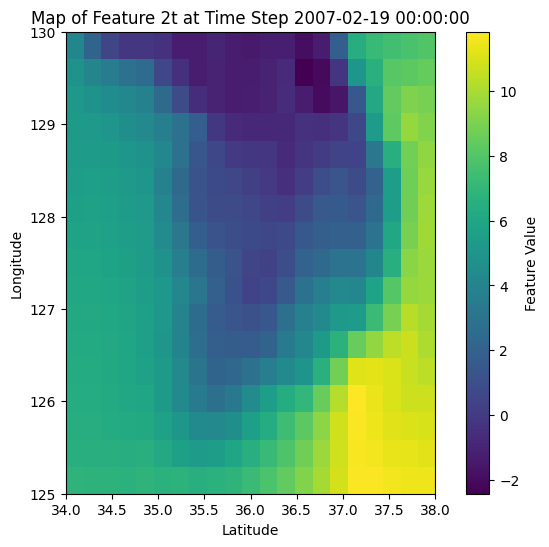

In [ ]:
import matplotlib.pyplot as plt

# Example: Plotting a specific feature at a specific time step
feature_index = 8
time_step = 0

plt.imshow(data_array[:, :, feature_index, time_step], extent=(lat.min(), lat.max(), lon.min(), lon.max()))
plt.colorbar(label='Feature Value')
plt.title(f'Map of Feature {features[feature_index]} at Time Step {timesteps[time_step]}')
plt.ylabel('Longitude')
plt.xlabel('Latitude')
plt.show()

Shape of X: (17, 21)
Shape of Y: (17, 21)
Shape of C: (17, 21)


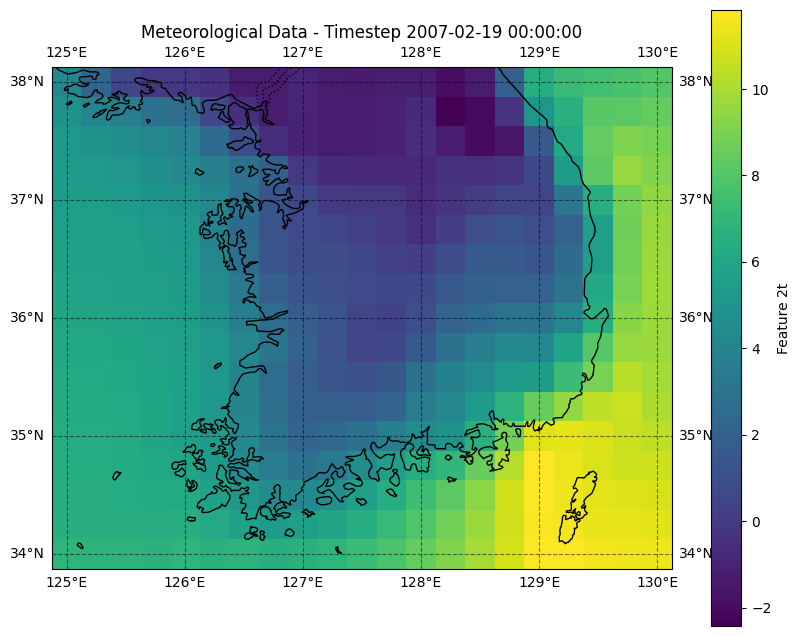

In [ ]:
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import numpy as np

def plot_meteorological_data(lat, lon, data, feature_index, timestep, title="Meteorological Data"):
    """
    Plot meteorological data on a map using Cartopy.

    Parameters:
    - lon: 1D array, longitude values
    - lat: 1D array, latitude values
    - data: 4D array, meteorological data (longitude, latitude, features, timesteps)
    - feature_index: int, the index of the meteorological feature being plotted
    - timestep: int, the index of the timestep to be plotted
    - title: str, title of the plot (default is "Meteorological Data")
    """
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 8))

    # Reshape data for pcolormesh
    X, Y = np.meshgrid(lon, lat)
    C = data[:, :, feature_index, timestep]

    print(f"Shape of X: {X.shape}")
    print(f"Shape of Y: {Y.shape}")
    print(f"Shape of C: {C.shape}")

    # Plot the meteorological data
    im = ax.pcolormesh(X, Y, C, cmap='viridis', transform=ccrs.PlateCarree(), shading='auto')

    # Add coastlines and country borders
    ax.coastlines()
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')

    # Add gridlines
    ax.gridlines(draw_labels=True, linestyle='--', color='black', alpha=0.5)

    # Add a colorbar
    cbar = plt.colorbar(im, ax=ax, label=f"Feature {features[feature_index]}")

    # Set plot title
    plt.title(f"{title} - Timestep {timesteps[time_step]}")

    # Show the plot
    plt.show()

# Example usage:
plot_meteorological_data(lat, lon, data_array, 8, 0)


In [ ]:
def split_data(data):
    """
    Function to split time series data into train, val and test set.
    Respectively : 70% / 20% / 10%
    """
    num_timesteps=data.shape[-1]
    train_array = data[:,:,:,0:int(num_timesteps*0.7)]
    val_array = data[:,:,:,int(num_timesteps*0.7):int(num_timesteps*0.9)]
    test_array = data[:,:,:,int(num_timesteps*0.9):]

    return train_array, val_array, test_array

train_array, val_array, test_array = split_data(data_array)
print(f"Train size: {train_array.shape}")
print(f"Val size: {val_array.shape}")
print(f"Test size: {test_array.shape}")

Train size: (17, 21, 9, 1408)
Val size: (17, 21, 9, 402)
Test size: (17, 21, 9, 202)


In [ ]:
def scale(train_array, val_array, test_array):
    """
    Function to scale the entire dataset in place using the mean and standard deviation of the training data only.
    """
    # mean and std computed only on training set
    train_mean = train_array.mean()
    train_std = train_array.std()

    train_array = (train_array - train_mean) / train_std
    val_array = (val_array - train_mean) / train_std
    test_array = (test_array - train_mean) / train_std

    return train_array, val_array, test_array

scaled_train_array, scaled_val_array, scaled_test_array = scale(train_array, val_array, test_array)

In [ ]:
def inv_scale(train_array, scaled_array):
    """
    Function to inverse scaling of data in place by using the mean and standard deviation of the training data only.
    """
    # mean and std computed only on training set
    train_mean = train_array.mean()
    train_std = train_array.std()

    unscaled_df = (scaled_array + train_mean) * train_std

    return unscaled_df

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_array, val_df=val_array, test_df=test_array,
               label_columns=None):
    # Store the raw data.
    self.train_array = train_array
    self.val_array = val_array
    self.test_array = test_array

    # Work out the label column indices.
    self.label_columns = label_columns
    self.column_indices = {name: i for i, name in
                           enumerate(features)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    # Meant to be used for extracting input samples from window
    self.input_slice = slice(0, input_width)
    # np.arange(5), creates an array from 0 to 4 (start=0, stop=5, step=1)
    # Generate input indices of a given window
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    # Meant to be used for extracting target samples from window
    self.labels_slice = slice(self.label_start, None)
    # Generate output indices of a given window
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
# TODO : Find a city given its coordinates in an array of shape (lat, lon)

def plot(self, model=None, lon=0, lat=0, plot_col='2t', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, lon, lat, plot_col_index, :],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, lon, lat, label_col_index, :],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, lon, lat, label_col_index, :],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [ ]:
import torch
import torch.utils.data as data
from torch.utils.data import DataLoader

# Create a custom PyTorch Dataset
class TimeSeriesDataset(data.Dataset):
    def __init__(self, data, window):
        self.data = data
        self.window = multi_window

    def __len__(self):
        return self.data.shape[-1] - self.window.total_window_size + 1

    def __getitem__(self, idx):
        window_data = self.data[:, :, :, idx:idx+self.window.total_window_size]

        # Perform your split_window operation here
        inputs = window_data[:, :, :, self.window.input_slice]
        labels = window_data[:, :, :, self.window.labels_slice]

        if self.window.label_columns is not None:
            labels = [labels[:, :, self.window.column_indices[name], :] for name in self.window.label_columns], axis=-1)

        return inputs, labels

def make_dataset(self, data):
  # Create an instance of the custom dataset
  time_series_dataset = TimeSeriesDataset(data, self.total_window_size)

  # Use PyTorch DataLoader for batching
  batch_size = 32
  dataloader = DataLoader(time_series_dataset, batch_size=batch_size, shuffle=True)

  # Take a batch from the dataloader
  batch_iterator = iter(dataloader)
  batch = next(batch_iterator)

  assert batch[0].shape == (batch_size, lat.shape[0], lon.shape[0], len(features), self.input_width)
  assert batch[1].shape == (batch_size, lat.shape[0], lon.shape[0], len(features), self.label_width)

  return dataloader

WindowGenerator.make_dataset = make_dataset

In [ ]:
# The @property decorator allows you to define a method that can be accessed
# like an attribute, but it will be computed dynamically when it is accessed

@property
def train(self):
  return self.make_dataset(self.train_array)

@property
def val(self):
  return self.make_dataset(self.val_array)

@property
def test(self):
  return self.make_dataset(self.test_array)

#
@property
def example(self):
  """
  Get and cache an example batch of `inputs, labels` for plotting.
  The method uses a caching mechanism to avoid recomputing the example
  batch every time it is accessed
  """
  # Check if self._example exist
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
# We have two samples per day one at 00h and one at 12h

OUT_STEPS = 12
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS,
                               label_columns=['2t'])

multi_window.plot()
multi_window

TypeError: ignored

In [ ]:
import torch
import torch.nn as nn

class ConvLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, kernel_size, num_layers, output_size):
        super(ConvLSTMModel, self).__init__()

        self.conv_lstm = nn.ConvLSTM2D(
            input_size=input_size,
            hidden_size=hidden_size,
            kernel_size=kernel_size,
            num_layers=num_layers,
            batch_first=True,
        )

        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        lstm_out, _ = self.conv_lstm(x)
        output = self.fc(lstm_out[:, -1, :, :, :])  # Assuming you want the last time step as output
        return output


# Instantiate the model
model = ConvLSTMModel(
    input_size=len(features),
    hidden_size=64,
    kernel_size=(3, 3),
    num_layers=1,
    output_size=multi_window.label_width
)

batch_iterator = iter(multi_window.dataloader)
batch = next(batch_iterator)

# Forward pass
output = model(batch[0])

# Print the output shape
print(output.shape)

AttributeError: ignored

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Dense

lat_shape = lat.shape[0]
lon_shape = lon.shape[0]
feature_len = len(features)
input_width = multi_window.input_width

model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(lat_shape, lon_shape, feature_len, input_width)))
model.add(Dense(multi_window.label_width))  # Adjust the output shape accordingly

model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary to see the output shape
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d_2 (ConvLSTM2D)  (None, 19, 7, 64)         203008    
                                                                 
 dense_2 (Dense)             (None, 19, 7, 12)         780       
                                                                 
Total params: 203788 (796.05 KB)
Trainable params: 203788 (796.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
batch_iterator = iter(multi_window.train)
batch = next(batch_iterator)

# Make a prediction
predictions = model.predict(batch[0])

# Print or use the predictions as needed
print(predictions.shape)

TypeError: ignored

4492/4492 [==============================] - 38s 8ms/step - loss: 1118045568.0000 - mean_absolute_error: 13118.4014


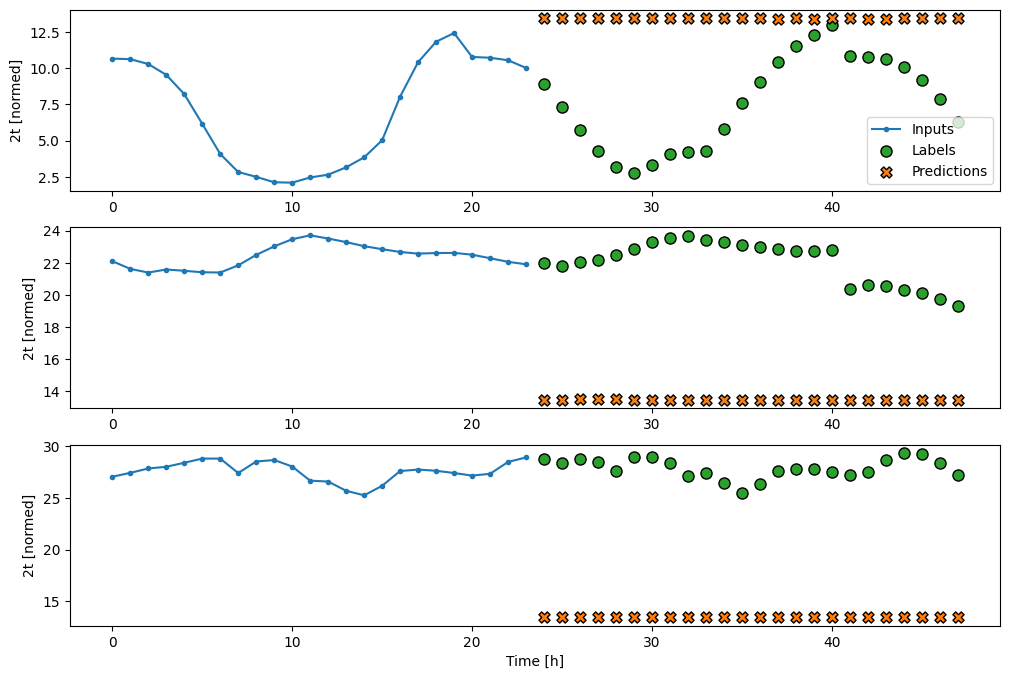

In [ ]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance = multi_lstm_model.evaluate(multi_window.val)
multi_performance = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

In [ ]:
# https://www.tensorflow.org/tutorials/structured_data/time_series?hl=fr#rnn_2